In [1]:
import numpy as np
import os
import pickle
import tensorflow as tf
from tensorflow import keras

In [2]:
import cv2 as cv
import mediapipe as mp

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'asl_model1.keras',
 'asl_model2.keras',
 'asl_prototype.ipynb',
 'data',
 'data_videos.pickle',
 'GRU_trial.ipynb',
 'labels.pickle',
 'log_dir',
 'white.png']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
lstm_model=keras.models.load_model('asl_model1.keras')

In [8]:
lstm_model.layers


In [9]:
x=pickle.load(open('data_videos.pickle','rb'))
labels=pickle.load(open('labels.pickle','rb'))

In [12]:
y=keras.utils.to_categorical(labels)

In [14]:
x.shape,y.shape

((150, 30, 1662), (150, 5))

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.15)

In [23]:
lstm_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 57ms/step - loss: 0.5190 - categorical_accuracy: 0.9565


[0.519020676612854, 0.95652174949646]

In [24]:
lstm_model.evaluate(x_train,y_train)

4/4 [==============================] - 0s 49ms/step - loss: 0.1140 - categorical_accuracy: 0.9606


[0.1139683946967125, 0.960629940032959]

In [18]:
# working now on gru

In [19]:
model=keras.Sequential()
model.add(keras.layers.GRU(128,activation='relu',return_sequences=True,input_shape=(30,1662)))
model.add(keras.layers.GRU(64,activation='relu',return_sequences=True))
model.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(5,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           688128    
                                                                 
 gru_1 (GRU)                 (None, 30, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 739141 (2.82 MB)
Trainable params: 739141 

In [26]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
4/4 [==============================] - 10s 483ms/step - loss: 1.6139 - categorical_accuracy: 0.2205 - val_loss: 1.5974 - val_categorical_accuracy: 0.2174
Epoch 2/100
4/4 [==============================] - 1s 183ms/step - loss: 1.6070 - categorical_accuracy: 0.1732 - val_loss: 1.5776 - val_categorical_accuracy: 0.4348
Epoch 3/100
4/4 [==============================] - 1s 184ms/step - loss: 1.5735 - categorical_accuracy: 0.3150 - val_loss: 1.5328 - val_categorical_accuracy: 0.3913
Epoch 4/100
4/4 [==============================] - 1s 202ms/step - loss: 1.5329 - categorical_accuracy: 0.2992 - val_loss: 1.4811 - val_categorical_accuracy: 0.4783
Epoch 5/100
4/4 [==============================] - 1s 185ms/step - loss: 1.4476 - categorical_accuracy: 0.4016 - val_loss: 1.3890 - val_categorical_accuracy: 0.4348
Epoch 6/100
4/4 [==============================] - 1s 182ms/step - loss: 1.3483 - categorical_accuracy: 0.4882 - val_loss: 1.3271 - val_categorical_accuracy: 0.3913
Epoch 7/1

KeyboardInterrupt: 

In [27]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 1.4387 - categorical_accuracy: 0.9130


[1.4387398958206177, 0.9130434989929199]

In [30]:
model.save('gru_model1.keras')

In [34]:
model2=keras.Sequential()
model2.add(keras.layers.GRU(128,activation='relu',return_sequences=True,input_shape=(30,1662)))
model2.add(keras.layers.GRU(64,activation='relu',return_sequences=True))
model2.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
model2.add(keras.layers.Dense(64,activation='relu'))
model2.add(keras.layers.Dense(32,activation='relu'))
model2.add(keras.layers.Dense(5,activation='softmax'))


model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [35]:
history2=model2.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
4/4 [==============================] - 9s 488ms/step - loss: 1.6192 - categorical_accuracy: 0.1732 - val_loss: 1.6031 - val_categorical_accuracy: 0.2174
Epoch 2/100
4/4 [==============================] - 1s 201ms/step - loss: 1.6009 - categorical_accuracy: 0.2598 - val_loss: 1.5870 - val_categorical_accuracy: 0.5652
Epoch 3/100
4/4 [==============================] - 1s 184ms/step - loss: 1.5785 - categorical_accuracy: 0.3543 - val_loss: 1.5597 - val_categorical_accuracy: 0.5652
Epoch 4/100
4/4 [==============================] - 1s 199ms/step - loss: 1.5434 - categorical_accuracy: 0.4173 - val_loss: 1.5235 - val_categorical_accuracy: 0.7391
Epoch 5/100
4/4 [==============================] - 1s 206ms/step - loss: 1.4817 - categorical_accuracy: 0.5512 - val_loss: 1.4595 - val_categorical_accuracy: 0.3478
Epoch 6/100
4/4 [==============================] - 1s 194ms/step - loss: 1.4035 - categorical_accuracy: 0.5197 - val_loss: 1.4007 - val_categorical_accuracy: 0.3913
Epoch 7/10

In [36]:
model2.evaluate(x_test,y_test)

1/1 [==============================] - 0s 59ms/step - loss: 1.3189 - categorical_accuracy: 0.9565


[1.3189350366592407, 0.95652174949646]

In [37]:
import  matplotlib.pyplot as plt

loss


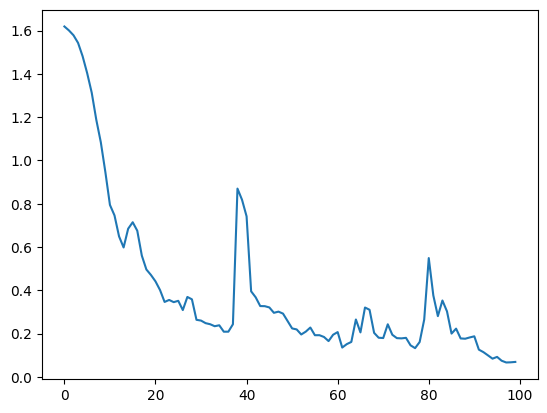

categorical_accuracy


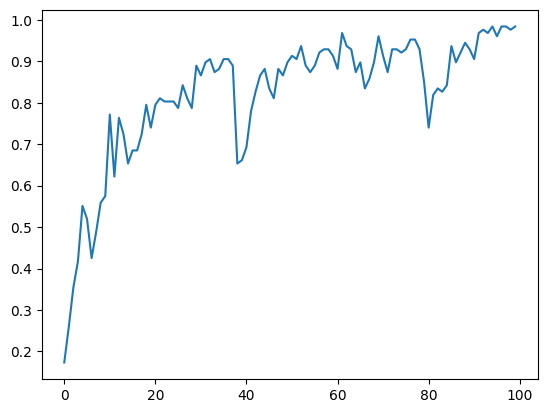

val_loss


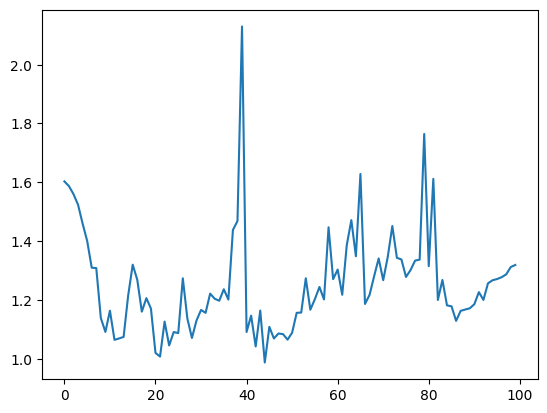

val_categorical_accuracy


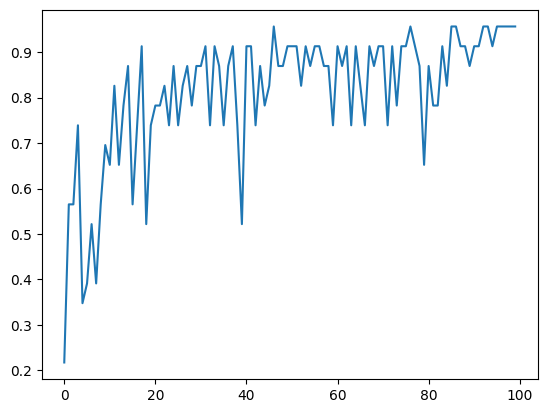

In [43]:
for i in history2.history.keys():
    print(i)
    plt.plot(history2.history[i])
    plt.show()